In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from fbprophet import Prophet 
import warnings 
warnings.filterwarnings('ignore')
import gc 

In [2]:
# data source url 'https://archive.ics.uci.edu/ml/datasets/individual+household+electric+power+consumption'

df = pd.read_csv('../input/individual-household-electric-power-consumption/household_power_consumption.txt', sep=';')

In [3]:
df.head(10)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
5,16/12/2006,17:29:00,3.520,0.522,235.020,15.000,0.000,2.000,17.0
6,16/12/2006,17:30:00,3.702,0.520,235.090,15.800,0.000,1.000,17.0
7,16/12/2006,17:31:00,3.700,0.520,235.220,15.800,0.000,1.000,17.0
8,16/12/2006,17:32:00,3.668,0.510,233.990,15.800,0.000,1.000,17.0
9,16/12/2006,17:33:00,3.662,0.510,233.860,15.800,0.000,2.000,16.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [5]:
df.isnull().sum()

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [6]:
df.isnull().values.any()

True

In [7]:
df1 = df.copy()

In [8]:
df1['DateTime'] = pd.to_datetime(df1['Date'] + ' ' + df1['Time'])

df1 = df1.set_index('DateTime')



In [9]:
df1.head(10)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
DateTime,,,,,,,,,
2006-12-16 17:24:00,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16 17:27:00,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16 17:28:00,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
2006-12-16 17:29:00,16/12/2006,17:29:00,3.520,0.522,235.020,15.000,0.000,2.000,17.0
2006-12-16 17:30:00,16/12/2006,17:30:00,3.702,0.520,235.090,15.800,0.000,1.000,17.0
2006-12-16 17:31:00,16/12/2006,17:31:00,3.700,0.520,235.220,15.800,0.000,1.000,17.0
2006-12-16 17:32:00,16/12/2006,17:32:00,3.668,0.510,233.990,15.800,0.000,1.000,17.0


In [10]:
df1 = df1.drop(['Date','Time'], axis = 1)

In [11]:
df1.head(10)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
DateTime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
2006-12-16 17:29:00,3.520,0.522,235.020,15.000,0.000,2.000,17.0
2006-12-16 17:30:00,3.702,0.520,235.090,15.800,0.000,1.000,17.0
2006-12-16 17:31:00,3.700,0.520,235.220,15.800,0.000,1.000,17.0
2006-12-16 17:32:00,3.668,0.510,233.990,15.800,0.000,1.000,17.0


In [12]:
df1.index

DatetimeIndex(['2006-12-16 17:24:00', '2006-12-16 17:25:00',
               '2006-12-16 17:26:00', '2006-12-16 17:27:00',
               '2006-12-16 17:28:00', '2006-12-16 17:29:00',
               '2006-12-16 17:30:00', '2006-12-16 17:31:00',
               '2006-12-16 17:32:00', '2006-12-16 17:33:00',
               ...
               '2010-11-26 20:53:00', '2010-11-26 20:54:00',
               '2010-11-26 20:55:00', '2010-11-26 20:56:00',
               '2010-11-26 20:57:00', '2010-11-26 20:58:00',
               '2010-11-26 20:59:00', '2010-11-26 21:00:00',
               '2010-11-26 21:01:00', '2010-11-26 21:02:00'],
              dtype='datetime64[ns]', name='DateTime', length=2075259, freq=None)

In [13]:
df_typechange = df1.copy()

df_typechange.isnull().sum()

Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [14]:
mean_value=df_typechange['Sub_metering_3'].mean()

df_typechange['Sub_metering_3'].fillna(value=mean_value, inplace=True)


In [15]:
df_typechange.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [16]:
df_typechange['Global_active_power'] = pd.to_numeric(df_typechange['Global_active_power'], errors='coerce').fillna(method = 'ffill')

In [17]:
df_typechange.Global_reactive_power = pd.to_numeric(df_typechange.Global_reactive_power, errors='coerce')

df_typechange.Voltage = pd.to_numeric(df_typechange.Voltage, errors='coerce')

df_typechange.Global_intensity = pd.to_numeric(df_typechange.Global_intensity, errors='coerce')

df_typechange.Sub_metering_1 = pd.to_numeric(df_typechange.Sub_metering_1, errors='coerce')

df_typechange.Sub_metering_2 = pd.to_numeric(df_typechange.Sub_metering_2, errors='coerce')

In [18]:
df_typechange.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


In [19]:
df_typechange.head(10)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
DateTime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
2006-12-16 17:29:00,3.520,0.522,235.02,15.0,0.0,2.0,17.0
2006-12-16 17:30:00,3.702,0.520,235.09,15.8,0.0,1.0,17.0
2006-12-16 17:31:00,3.700,0.520,235.22,15.8,0.0,1.0,17.0
2006-12-16 17:32:00,3.668,0.510,233.99,15.8,0.0,1.0,17.0


In [20]:
df_resample = df_typechange.resample('D').sum()

In [21]:
df_resample = df_resample.round({'Global_active_power': 3, 'Global_reactive_power': 3, 'Voltage': 2, 'Global_intensity': 2,'Sub_metering_1': 1, 'Sub_metering_2' : 1, 'Sub_metering_3': 1})



In [22]:
df_resample.head(10)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
DateTime,,,,,,,
2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0
2006-12-21,1717.112,144.166,346616.31,7238.6,1765.0,2623.0,10433.9
2006-12-22,2341.338,186.906,347305.75,9897.0,3151.0,350.0,11131.0
2006-12-23,4773.386,221.470,345795.95,20200.4,2669.0,425.0,14726.0
2006-12-24,2550.012,149.900,348029.91,11002.2,1703.0,5082.0,6891.0


In [23]:
df_resample.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

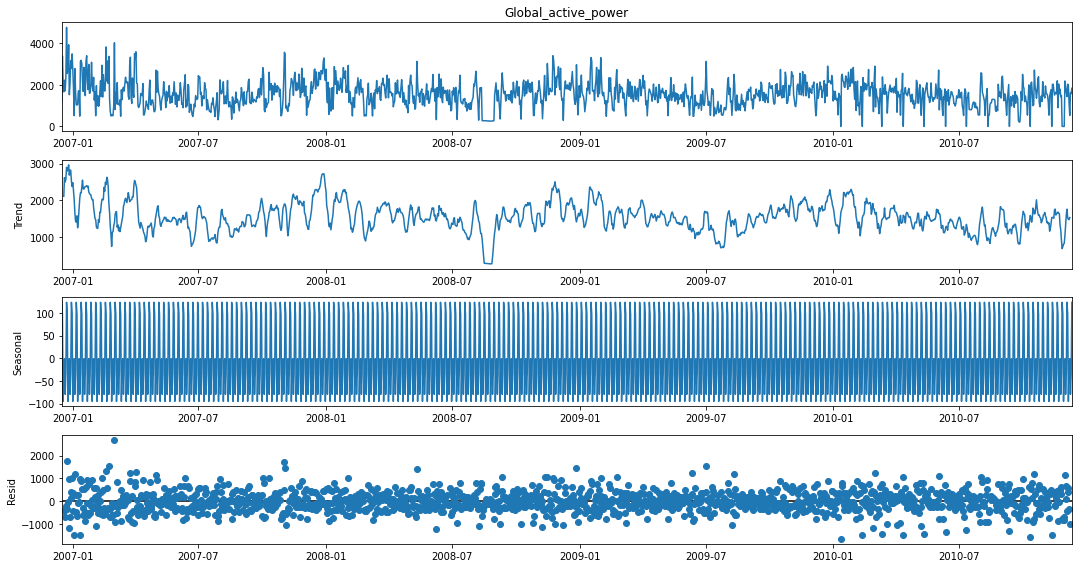

In [24]:
import statsmodels.api as sm

from pylab import rcParams

rcParams['figure.figsize'] = 15, 8

decompose_series = sm.tsa.seasonal_decompose(df_resample['Global_active_power'], model='additive')

decompose_series.plot()

plt.show()

In [25]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(df_resample['Global_active_power'])

print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used : {adf_result[3]}')
print('Critical Values:')

for k, v in adf_result[4].items():
    print(f'   {k}: {v}') 

ADF Statistic: -8.730466104846853
p-value: 3.2019908676494866e-14
No. of lags used: 8
No. of observations used : 1448
Critical Values:
   1%: -3.434874123222469
   5%: -2.8635380960841084
   10%: -2.5678337706609993


In [26]:
df_resample.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [27]:
df_diff = df_resample.diff(periods=1)

In [28]:
df_diff.isnull().sum()

Global_active_power      1
Global_reactive_power    1
Voltage                  1
Global_intensity         1
Sub_metering_1           1
Sub_metering_2           1
Sub_metering_3           1
dtype: int64

In [29]:
df_diff.head(10)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
DateTime,,,,,,,
2006-12-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-17,2181.284,191.084,252172.79,9217.8,2033.0,3641.0,8415.0
2006-12-18,-1186.634,-64.214,1648.32,-5151.4,-970.0,-1566.0,677.0
2006-12-19,-537.632,-10.850,1105.37,-2153.2,-224.0,4981.0,-7821.0
2006-12-20,559.554,10.056,444.60,2219.0,-839.0,-4954.0,7866.0
2006-12-21,-508.636,-16.832,-2307.30,-2074.4,1765.0,-25.0,-3629.1
2006-12-22,624.226,42.740,689.44,2658.4,1386.0,-2273.0,697.1
2006-12-23,2432.048,34.564,-1509.80,10303.4,-482.0,75.0,3595.0
2006-12-24,-2223.374,-71.570,2233.96,-9198.2,-966.0,4657.0,-7835.0


In [30]:
mean_value=df_diff['Global_active_power'].mean()

df_diff['Global_active_power'].fillna(value=mean_value, inplace=True)



mean_value=df_diff['Global_reactive_power'].mean()

df_diff['Global_reactive_power'].fillna(value=mean_value, inplace=True)




mean_value=df_diff['Voltage'].mean()

df_diff['Voltage'].fillna(value=mean_value, inplace=True)



mean_value=df_diff['Global_intensity'].mean()

df_diff['Global_intensity'].fillna(value=mean_value, inplace=True)



mean_value=df_diff['Sub_metering_1'].mean()

df_diff['Sub_metering_1'].fillna(value=mean_value, inplace=True)



mean_value=df_diff['Sub_metering_2'].mean()

df_diff['Sub_metering_2'].fillna(value=mean_value, inplace=True)



mean_value=df_diff['Sub_metering_3'].mean()

df_diff['Sub_metering_3'].fillna(value=mean_value, inplace=True)





In [31]:
df_diff.shape

(1457, 7)

In [32]:
df_diff.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

Text(0, 0.5, 'Daily_Global_active_power')

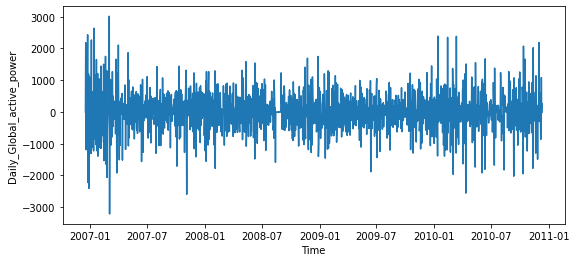

In [33]:
plt.figure(figsize=(9,4))

plt.plot(df_diff.index, df_diff.Global_active_power )

plt.xlabel('Time')

plt.ylabel('Daily_Global_active_power')

In [34]:
from scipy.stats import pearsonr

corr, _ = pearsonr(df_diff.Global_active_power, df_diff.Global_reactive_power)

corr = round(corr, 2)
 
corr

0.49

In [35]:
corr, _ = pearsonr(df_diff.Voltage, df_diff.Global_intensity)

corr = round(corr, 2)
 
corr

0.38

In [36]:
P_df = df.copy()

P_df.shape

(2075259, 9)

In [37]:
P_df.isnull().sum()

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [38]:
mean_value=P_df['Sub_metering_3'].mean()

P_df['Sub_metering_3'].fillna(value=mean_value, inplace=True)

In [39]:
P_df['DateTime'] = pd.to_datetime(P_df['Date'] + ' ' + P_df['Time'])



In [40]:
P_df = P_df.reset_index()

In [41]:
P_df.head()

,index,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DateTime
0,0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0,2006-12-16 17:24:00
1,1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0,2006-12-16 17:25:00
2,2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0,2006-12-16 17:26:00
3,3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0,2006-12-16 17:27:00
4,4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0,2006-12-16 17:28:00


In [42]:
P_df = P_df.rename(columns={'DateTime':'ds', 'Global_active_power':'y'})


In [43]:
P_df.head()

,index,Date,Time,y,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,ds
0,0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0,2006-12-16 17:24:00
1,1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0,2006-12-16 17:25:00
2,2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0,2006-12-16 17:26:00
3,3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0,2006-12-16 17:27:00
4,4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0,2006-12-16 17:28:00


In [44]:
P_df.isnull().sum()

index                    0
Date                     0
Time                     0
y                        0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
ds                       0
dtype: int64

In [45]:
df_train = P_df[['ds', 'y']].iloc[:365]

In [46]:
df_train.head()

,ds,y
0,2006-12-16 17:24:00,4.216
1,2006-12-16 17:25:00,5.360
2,2006-12-16 17:26:00,5.374
3,2006-12-16 17:27:00,5.388
4,2006-12-16 17:28:00,3.666


In [47]:
df_test = P_df[['ds', 'y']].iloc[-365:]

In [48]:
df_test.head()

,ds,y
2074894,2010-11-26 14:58:00,2.254
2074895,2010-11-26 14:59:00,2.226
2074896,2010-11-26 15:00:00,2.24
2074897,2010-11-26 15:01:00,1.588
2074898,2010-11-26 15:02:00,1.452


In [49]:
df_test.shape

(365, 2)

In [50]:
model = Prophet()

model.fit(df_train)

Initial log joint probability = -6.48877


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      77       660.786   0.000828581       66.9484   1.169e-05       0.001      135  LS failed, Hessian reset 
      99       660.833   3.65521e-05       58.5792      0.7911      0.7911      162   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     119       660.837   8.21184e-06       70.8088    1.39e-07       0.001      223  LS failed, Hessian reset 
     158       660.841   3.61511e-05       65.5925   5.762e-07       0.001      310  LS failed, Hessian reset 
     199       660.843   5.98567e-07       49.9033           1           1      373   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     283        660.98   0.000633749       68.4816     1.2e-05       0.001      519  LS failed, Hessian reset 
     299       661.011   6.24665e-05       61.3589      0.9117      0.9117      543   
    Iter      log p

In [52]:
forecast = model.predict(df_test) 

forecast.head()

In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']]

In [ ]:
model.plot(forecast)

plt.show()

In [ ]:
model.plot_components(forecast)

plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error

y_pred = forecast['yhat'].values
y_true = df_test['y'].values

mae = mean_absolute_error(y_true, y_pred)

print('MAE: %.2f' % mae)

In [ ]:
def mape(y_true, y_pred): 
    
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
mape(y_true, y_pred)

In [ ]:
import math 

mse = np.square(np.subtract(y_true, y_pred))

RMSE = math.sqrt(mse)